# Trending YouTube Video Data Analysis
*By Isaiah Adams-Hart*
## Dataset information
This analysis is using a free database from kaggle.com. It is available at https://www.kaggle.com/datasnaek/youtube-new. The database contains information about trending videos posted on YouTube in the US region. Trending videos are determined by an algorithm that factors in user interaction such as likes, comments, and shares. 

## Analysis
I will be using a linear regression for this analysis about three different questions on trending videos:
1. Is there a correlation between the number likes and dislikes?
2. Is there a correlation between the numbers of likes and views?
3. Is there a correlation between the length of a description and views?


In [76]:
# First we bring in our imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from pylab import rcParams
import seaborn as sb

import scipy
from scipy.stats.stats import pearsonr


In [64]:
# Next we will create the dataframe, 
df = pd.read_csv('USvideos.csv')

# organize and spot clean our dataset,
df['description_length'] = df['description'].str.len()
df['description_length'] = df['description_length'].fillna(0)
df = df.sort_values('views').drop_duplicates('title', keep='last')

# and prep our variables.
likes = df['likes']
dislikes = df['dislikes']
views = df['views']
description_length = df['description_length']

## Question #1
Is there a correlation between the number likes and dislikes?

PearsonR Correlation Coefficient 0.421


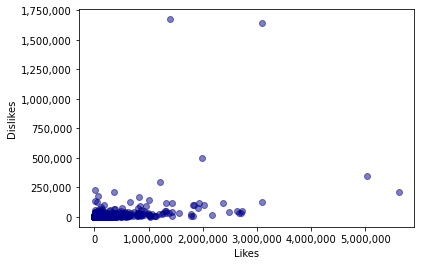

In [84]:
# Now we will find the coefficient for the first question.
pearsonr_coefficient, p_values = pearsonr(likes,dislikes)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

# And display a plot for reference.
fig, ax = plt.subplots()
ax.scatter(likes, dislikes, c='DarkBlue', alpha=0.5)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Likes')
ax.set_ylabel('Dislikes')
plt.show()

### Results

The above Pearson Correlation test gives us a coefficient of 0.42. That means that there is a mild correlation between likes and dislikes on trending videos. If our data were statistically valid, then we could be reasonably sure for every like, the dislikes would also increase.

## Question #2
Is there a correlation between the numbers of likes and views?

PearsonR Correlation Coefficient 0.834


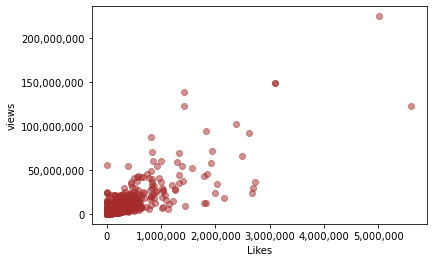

In [85]:
pearsonr_coefficient, p_values = pearsonr(likes,views)

print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

fig, ax = plt.subplots()
ax.scatter(likes, views, c='Brown', alpha=0.5)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Likes')
ax.set_ylabel('views')
plt.show()

### Results
This time we get a result of 0.83, which is a strong correlation. If our data is valid, then we can be reasonably sure that as the number of likes increase, so do the number of views. There are a few outliers, but they seem to be following the general trend in the data.

## Question #3
Is there a correlation between the length of a description and views?

PearsonR Correlation Coefficient -0.006


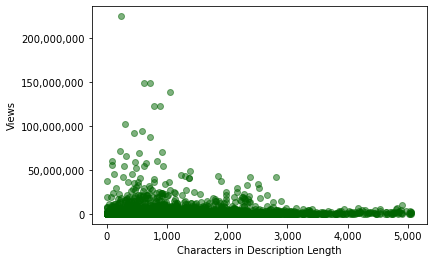

In [87]:
pearsonr_coefficient, p_values = pearsonr(description_length,views)

print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

fig, ax = plt.subplots()
ax.scatter(description_length, views, c='DarkGreen', alpha=0.5)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Characters in Description Length')
ax.set_ylabel('Views')
plt.show()

### Results
This test returned a result of almost 0. Given this test is appropriate for out data, this means there is virtually no connection between how long a description is and how many views that it receives. 

## Exceptions
While we have gotten several different results and the scatter plots seem to back up our observations, we can not be certain about our results. We would need to run a few more tests on the data to make sure that it is valid and appropriate for our tests.

# Conclusion
Assuming that our data is valid, then we can be reasonable certain of the following answers to our questions:

1. Is there a correlation between the number likes and dislikes?  
There is a mild correlation between likes and dislikes with a few outliers that may be skewing the data. As likes increase, there is a moderate increase in dislikes with a correlation coefficient of 0.42.
  
2. Is there a correlation between the numbers of likes and views?  
There is a strong correlation between likes and views. While there are some outliers, we can be reasonable certain that as our likes increase so do our views. The correlation coefficient is 0.83.
  
3. Is there a correlation between the length of a description and views?  
There is virtually no correlation between the length of a description and the amount of views it receives. It has a correlation coefficient of -0.006.
  
In conclusion, given our data is accurate and appropriate, the more likes a video recieve, the more dislikes and views the video also receives. There is no relationship between the length of a description and views.